In [1]:
import pvdeg
import xarray as xr
import numpy as np
import pandas as pd
import pickle

In [2]:
with open("small_usa_geometa.pkl", 'rb') as f:
    meta = pickle.load(f)

with open("small_usa_geoweather.pkl", 'rb') as f:
    weather = pickle.load(f)

# meta
# weather

In [3]:
res = pvdeg.pysam.inspire_ground_irradiance(
    weather_df=weather.isel(gid=0).to_dataframe(),
    meta=meta.iloc[0].to_dict(),
    config_files={"pv":"01_pvsamv1.json"}
)

In [4]:
single_location_xr = pvdeg.pysam._handle_pysam_return(
    res
)

single_location_xr

<xarray.Dataset> Size: 771kB
Dimensions:            (time: 8760, distance: 10)
Coordinates:
  * time               (time) datetime64[ns] 70kB 2023-01-01T00:30:00 ... 202...
  * distance           (distance) int32 40B 0 1 2 3 4 5 6 7 8 9
Data variables:
    annual_poa         float64 8B 3.223e+05
    ground_irradiance  (time, distance) float64 701kB dask.array<chunksize=(8760, 10), meta=np.ndarray>

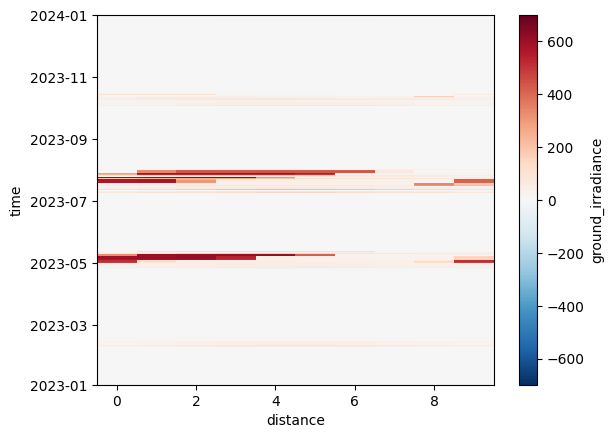

In [6]:
single_location_xr['ground_irradiance'].plot()

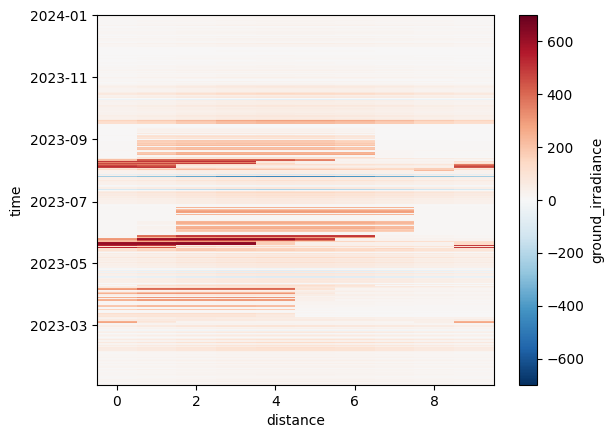

In [ ]:
mask = np.any(single_location_xr.ground_irradiance != 0, axis=1)

nonzero = single_location_xr.ground_irradiance.compute()[mask.compute()]

nonzero.compute()

nonzero.plot()

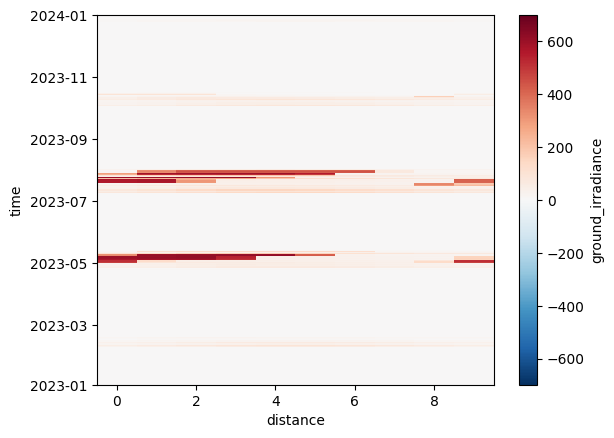

In [10]:
mask = np.any(single_location_xr.ground_irradiance >= 0, axis=1)

nonnegative = single_location_xr.ground_irradiance.compute()[mask.compute()]

nonnegative.compute()

nonnegative.plot()